<img src="https://www.dpo.rwth-aachen.de/global/show_picture_asis.asp?id=aaaaaaaabftpwfx" width=200 height=200 align="left" /> <img src="https://www.dpo.rwth-aachen.de/global/show_picture_asis.asp?id=aaaaaaaabftpxde" width=200 height=200 align="right" />

<h1><center> Introduction to Programming for Business Analytics </center></h1>  

<p style="text-align:left;">
    Murwan Siddig, Stefan Pilot
</p>
<a href="mailto:ipba@dpo.rwth-aachen.de">ipba@dpo.rwth-aachen.de</a> <br>

## Lecture 2: Elementary Data Types


### Outline

- Numeric Data Types: Integers and Floating-point Numbers.
- Boolean values.
- Strings.
- Vectors.

---
### Data Types
- In Julia, every value has a data type.
- A value's data type determines how we can use the value.
- In this lecture, we are going to discuss six elementary data types in Julia:
    1. **`Int64`:** stores (positive and negative) *whole* numbers within a *limited range*.
    2. **`BigInt`:** stores (positive and negative) *whole* numbers, even those *outside* of `Int64` range.
    3. **`Float64`:** stores (positive and negative) numbers that have potential *decimal* places.
    4. **`Bool`:** stores two possible logical (*Boolean*) values: `true` and `false`.
    5. **`String`:** a set of characters for representing *text*.
    6. **`Vector`:** a data *container* that may contain more than one value.
- To see an example of each data type we can use the Julia function `typeof`.
    - The Julia function `typeof` has one parameter and returns the data type of its argument.

In [1]:
typeof(1)

Int64

In [2]:
typeof(999999999999999999999999999999999999999)

BigInt

In [3]:
typeof(3.14)

Float64

In [4]:
typeof(true)

Bool

In [5]:
typeof("IPBA")

String

In [6]:
typeof([1, 999999999999999999999999999999999999999, 3.14, true, "IPBA", []])

Vector{Any} (alias for Array{Any, 1})

In [7]:
subtypes(AbstractFloat)

4-element Vector{Any}:
 BigFloat
 Float16
 Float32
 Float64

---
### Why do we need multiple numeric data types?

- **Question**: Why are there different data types for numbers (e.g., `Int64`, `BigInt`, and `Float64`)?
- **Answer**: Each numeric data type has its pros and cons $\implies$ no single numeric data type is suitable for using in every situation.  

Let's elaborate:
- The computer's memory is organized into a sequence of elements, each of these elements is called a **bit**.
    - A *bit* can have only two states: `0` or `1`.
- Since the computer memory is limited, every information that a computer can process must be represented as a **finite** sequence of bits.

$\implies$ Different numeric data types are designed to address different aspects of this *limitation*.

- **Note:** 
    - Bits are grouped into what is referred to as *words*, and in most computers, *1 word = 64 bit*.
    - `Int64`, `BigInt`, and `Float64` are not the only numeric data types in Julia.

----
### Representing Integers using `Int64`

- A value of type `Int64` uses one *64-bit word* per number.
- Different permutations (of `0` and `1`) in the 64 positions represent different numbers.
    - The following table shows examples of how different permutations of `0` and `1` represent different numbers in `Int64`.

|Number | Representation in `Int64`|
|:------|:-------------------------|
|$0$    |`0000000000000000000000000000000000000000000000000000000000000000`|
|$1$    |`0000000000000000000000000000000000000000000000000000000000000001`|
|$2$    |`0000000000000000000000000000000000000000000000000000000000000010`|
|$3$    |`0000000000000000000000000000000000000000000000000000000000000011`|
|$\dots$|$\dots$|
|$\dots$|$\dots$|
|$2^{63}-1$|`0111111111111111111111111111111111111111111111111111111111111111`|
|$-2^{63}$ |`1000000000000000000000000000000000000000000000000000000000000000`|

The Julia function `bitstring` has one parameter and returns the bit representation of its argument.

In [8]:
println(bitstring(0))
println(bitstring(1))
println(bitstring(2))
println(bitstring(3))
println(bitstring(2^63 - 1))
println(bitstring(-2^63))

0000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000001
0000000000000000000000000000000000000000000000000000000000000010
0000000000000000000000000000000000000000000000000000000000000011
0111111111111111111111111111111111111111111111111111111111111111
1000000000000000000000000000000000000000000000000000000000000000


---
### Wraparound Behavior
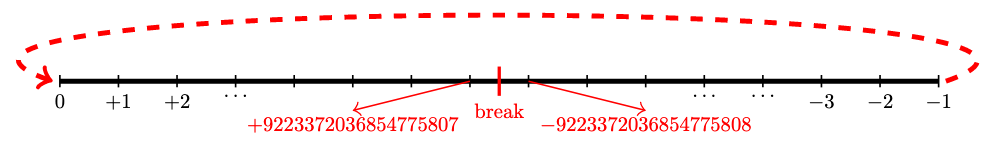

- When adding to the *highest* representable `Int64` number ($2^{63}-1$) the computation *wraps around*.

In [9]:
println(2^63-1)
println(2^63)

9223372036854775807
-9223372036854775808


- When subtracting from the *lowest* representable `Int64` number ($-2^{63}$) the computation *wraps around*.

In [10]:
println(-2^63)
println(-2^63 - 1)

-9223372036854775808
9223372036854775807


**Note:** A wraparound behavior is also known as *overflow*.

---
### Representing Large Integers using `BigInt`
- A value of type `BigInt` can represent any number, using as many words as necessary.
    - The number of words is chosen *behind the scenes*.
    - Only limit: Size of computer's memory.

In [11]:
BigInt(2)^128

340282366920938463463374607431768211456

---
### Representing Numbers using `Float64`

- `Float64` uses one 64-bit word per number.
- To facilitate representing a wide range of numbers, `Float64` uses *scientific notation* to approximate very small and large numbers. 
- Using approximation leads `Float64` to become prone to inaccuracy. 

In [12]:
0.1 + 0.2

0.30000000000000004

**Question:** If `Float64` is inaccurate, is it still useful?<br>
**Answer:** Yes, the precision is sufficient for most practical applications.

**Recommendation:** 
- Whenever it is possible to use `Int64`, use `Int64`.
- If you must use `Float64`, take it's inaccuracy into account.

**Question:** How do we take `Float64`'s inaccuracy into account?<br>
**Answer:** One way is to use Julia the built-in function `isapprox` instead.

In [13]:
isapprox(0.1+0.2,0.3)

true

---
### `Float64` has special values: 
 - The number `0.0` is represented in two ways:

In [14]:
println(1.0 * 0.0)
println(-1.0 * 0.0)

0.0
-0.0


- $\infty$, $-\infty$ are represented as `Inf` and `-Inf`, respectively:

In [15]:
println(2.0^1024)
println(-2.0^1024)

Inf
-Inf


- Undefined results (e.g., result of dividing by $0$) are represented as a value called `NaN` (*Not a Number*):

In [16]:
0/0

NaN

---
### Overview on `Int64`, `BigInt`, and `Float64`

|                          |  | **`Int64`** |  | **`BigInt`** |  | **`Float64`** |
|:-------------------------|:-|:------------|:-|:-------------|:-|:--------------|
|**Type of numbers**       |  |Whole        |  | Whole        |  | Whole + fractional|
|**Range**                 |  | Between $-2^{63}$ and $2^{63}-1$|  | Every negative or positive integer| | Wide range of real numbers|
|**Precise**               |  |Yes          |  | Yes          |  | No            |
|**Efficient calculation** |  |Yes          |  | No           |  | Yes           |  



---
### The `Bool` Data Type and Comparison Operators
**Question:** When do we need to take `Float64`'s inaccuracy into account?<br>
**Answer:** When comparing two numbers for equality.    

**Question:** How do we compare two numbers for equality?<br>
**Answer:** We can use a the *equality* operator `==`.

- The equality operator `==` is a **comparison** operator (like `>` and `<`), it compares two operands and produces:
    - **false** $\rightarrow$ if the statement is incorrect.
    - **true** $\rightarrow$ if the statement is correct.

In [17]:
println(-0.0 == 0.0)
println(0.1 + 0.2 == 0.3)

true
false


- Comparison operators are binary operators.
- Below is a list of the common comparision operators:

|Name                 | | Maths symbol| |Julia syntax| |Example       |                     |
|:--------------------|-|:------------|-|:-----------|-|:-------------|:--------------------|
|Equality             | |$=$          | |`==`        | |`-0.0 == 0.0` |$\rightarrow$ `true` |
|Inequality           | |$\neq$       | |`!=`        | |`-0.0 != 0.0` |$\rightarrow$ `false`|
|Less than            | |$<$          | |`<`         | |`-0.0 < 0.0`  |$\rightarrow$ `false`|
|Less than or equal   | |$\leq$       | |`<=`        | |`-0.0 <= 0.0` |$\rightarrow$ `true` |
|Greater than         | |$>$          | |`>`         | |`-0.0 > 0.0`  |$\rightarrow$ `false`|
|Greater than or equal| |$\geq$       | |`>=`        | |`-0.0 >= 0.0` |$\rightarrow$ `true` |


- Comparison operators introduce two things:
    - A **boolean expression** (e.g., `-0.0 == 0.0`).
    - The data type `Bool` which has two literals: `false` and `true`.


- **Recall:** Every program can be broken into: input, output, maths, conditional execution, and repetition.
    - Boolean expressions play a vital role in the *conditional execution* and *repetition* parts of a program.

---
### List of Common Comparison Operators

|Name                 | | Maths symbol| |Julia syntax| |Example       |                     |
|:--------------------|-|:------------|-|:-----------|-|:-------------|:--------------------|
|Equality             | |$=$          | |`==`        | |`-0.0 == 0.0` |$\rightarrow$ `true` |
|Inequality           | |$\neq$       | |`!=`        | |`-0.0 != 0.0` |$\rightarrow$ `false`|
|Less than            | |$<$          | |`<`         | |`-0.0 < 0.0`  |$\rightarrow$ `false`|
|Less than or equal   | |$\leq$       | |`<=`        | |`-0.0 <= 0.0` |$\rightarrow$ `true` |
|Greater than         | |$>$          | |`>`         | |`-0.0 > 0.0`  |$\rightarrow$ `false`|
|Greater than or equal| |$\geq$       | |`>=`        | |`-0.0 >= 0.0` |$\rightarrow$ `true` |


 ---
### Data Container

- All data types we have introduced so far are primitive $\implies$ cannot be subdivided further into other elements of (the same or different) data types.
- A **data container** is a data type that may contain more values $\implies$ could be subdivided further into other elements of (the same or different) data types.

Most important container data types: `String` and `Vector`.

---
### `String`: Container of `Char` Values

- A `Char` (short for character) is a data type that represents a single *glyph*, whitespace, and special control values.
    - **Glyphs** can be any letter, digit, or symbol.
    
- To define a `Char` value in Julia we use single quotation delimeters `''`.

**Examples:**

In [18]:
'A'

'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)

In [19]:
typeof('A')

Char

In [20]:
'5'

'5': ASCII/Unicode U+0035 (category Nd: Number, decimal digit)

In [21]:
typeof('5')

Char

In [22]:
' ' 

' ': ASCII/Unicode U+0020 (category Zs: Separator, space)

In [23]:
typeof(' ')

Char

- We can also type **unicode characters** can be entered via *tab completion* of LaTeX-like abbreviations.
- For example, to get the greek letter $\pi$ we write `\pi` and press and hold `TAB (⇥)`

In [24]:
'π'

'π': Unicode U+03C0 (category Ll: Letter, lowercase)

In [25]:
typeof('π')

Char

- A `String` is a container data type that contains a sequence of `Char` values.<br>
$\implies$ `String` can represent arbitrary pieces of text.

- A `String` literal is the string's value enclosed between delimiters `""`.

**Examples:**

In [26]:
"Introduction to Programming for Business Analytics"

"Introduction to Programming for Business Analytics"

In [27]:
typeof("Introduction to Programming for Business Analytics")

String

---
### Escape Sequences

- The two `"` delimeters are not part of the `String`'s value.

- To have `"` as part of the string, we must *escape* them.
    - Julia's *escape character* is the backslash `\`.
    
**Examples:**

In [28]:
println("I am a String that contains \" as a character.")
println("I am a String that contains \\ as a character.")

I am a String that contains " as a character.
I am a String that contains \ as a character.


In [29]:
println("In the Julia code of the above examples, \\\"")
println("and \\\\ are examples of what is known as an")
println("escape sequence.")

In the Julia code of the above examples, \"
and \\ are examples of what is known as an
escape sequence.


In [30]:
print("We can also use escape sequences to repre-\nsent ")
print("special values such as the linebreak or\nthe tab ")
print("whitespace '\t'.\n")

We can also use escape sequences to repre-
sent special values such as the linebreak or
the tab whitespace '	'.


---
### Converting to `String`

- We can use the built-in function `string` to convert any Julia value to a `String`.

In [31]:
# converting an Int64 to a String
string(1)

"1"

In [32]:
# converting a BigInt to a String
string(BigInt(2)^128)

"340282366920938463463374607431768211456"

In [33]:
# converting a Float64 to a String
string(3.14)

"3.14"

In [34]:
# converting a Bool to a String
string(-0.0 == 0.0)

"true"

---
### Converting from `String`
- We can also convert some `String`s into other data types using the built-in function `parse`.

In [35]:
parse(Int64, "1")

1

In [36]:
parse(BigInt,"340282366920938463463374607431768211456")

340282366920938463463374607431768211456

In [37]:
parse(Float64, "3.14")

3.14

In [38]:
parse(Bool, "false")

false

---
### `String` and Print Statements

- `String` values are very useful inside of a print statement.
- In the following example, we include a `String` value in the print statement to display what is being calculated and the result of the calculation in the same line.

In [39]:
x = 3;
y = 1;
println("x+y= ", x+y)

x+y= 4


**Note:**
- The comma `,` between the string `"x+y= "` and the algebraic expression `x+y` is a delimiter.
- We can have as many string representation and algebraic expression pair as we want. 

In [40]:
println("x+y= ", x+y, " and ", "x-y= ", x-y)

x+y= 4 and x-y= 2


---
### `Vector`: Container of Data Types

- A vector is a data *container* that may contain more than one value of any data types.
- Vectors are also very often referred to as **Arrays**.
    - In many programming languages, what is known in Julia as a `Vector` is called an *Array*.
    - In Julia, a `Vector` is a special case of the data type `Array`.
    - We will discuss the Julia data type `Array` later, in another lecture.
- A vector literal is a comma-separated list of values inside the delimiters `[` and `]`.

**Examples:**

In [41]:
# an empty vector (array) of type Any
[]

Any[]

In [42]:
# a vector (array) containing 3 elements of the same type (Int64)
example_vector = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [43]:
# a vector (array) containing 4 elements of different types (Any)
[1.0, example_vector, "Hello!", []]

4-element Vector{Any}:
 1.0
  [1, 2, 3]
  "Hello!"
  Any[]

---
### The Dot `.` Syntax

For every *binary* operator like `+`, there is a corresponding **dot operator** `.+` that is automatically defined to perform (broadcast) `+` *element-by-element* on vectors.

**Examples:**

In [44]:
data1 = [1, 2, 3];
data2 = [3, 2, 1];

- **Scalar** addition, subtraction, multiplication, division and exponentiation:

In [45]:
println("data1 .+ 2 = ", data1 .+ 2) # scalar addition 
println("data1 .- 2 = ", data1 .- 2) # scalar subtraction
println("data1 .* 2 = ", data1 .* 2) # scalar multiplication
println("data1 ./ 2 = ", data1 ./ 2) # scalar division
println("data1 .^ 2 = ", data1 .^ 2) # scalar exponentiation

data1 .+ 2 = [3, 4, 5]
data1 .- 2 = [-1, 0, 1]
data1 .* 2 = [2, 4, 6]
data1 ./ 2 = [0.5, 1.0, 1.5]
data1 .^ 2 = [1, 4, 9]


- **Vector elementwise** addition, subtraction, multiplication, division and exponentiation:

In [46]:
println("data1 .+ data2 = ", data1 .+ data2) # vector elementwise addition 
println("data1 .- data2 = ", data1 .- data2) # vector elementwise subtraction
println("data1 .* data2 = ", data1 .* data2) # vector elementwise multiplication
println("data1 ./ data2 = ", data1 ./ data2) # vector elementwise division
println("data1 .^ data2 = ", data1 .^ data2) # vector elementwise exponentiation 

data1 .+ data2 = [4, 4, 4]
data1 .- data2 = [-2, 0, 2]
data1 .* data2 = [3, 4, 3]
data1 ./ data2 = [0.3333333333333333, 1.0, 3.0]
data1 .^ data2 = [1, 4, 3]


- Any (built-in and user-defined) **function** can be applied *elementwise* to any (compatible) vector with the dot `.` syntax.

In [47]:
sqrt.([4, 9, 16])

3-element Vector{Float64}:
 2.0
 3.0
 4.0

In [48]:
typeof.([1, 999999999999999999999999999999999999999, 3.14, true, "IPBA", []])

6-element Vector{DataType}:
 Int64
 BigInt
 Float64
 Bool
 String
 Vector{Any} (alias for Array{Any, 1})

In [49]:
debit(t)=15000*(1+0.04)^t;
periods = [6,8,10];

In [50]:
debit.(periods)

3-element Vector{Float64}:
 18979.785277440005
 20528.53575607911
 22203.664273775164

---
###  `String` vs. `Vector`: Similarities

`String`s and `Vector`s share many characteristics.
- Values inside of vectors and strings are stored sequentially.
    - Every value is associated with a position.
    - Positions are associated with numbers referred to as indices (plural for *index*).
    - Values can be retrieved using their index (i.e., the position's number).
- To retrieve a value from a `String` or `Vector`, we pass the index of the position to the *bracket operator*.

**Examples:**

In [51]:
my_vector = [6, 5, 4, 3, 2, 1]
my_string = "Hello, world!";

In [52]:
my_vector[1]

6

In [53]:
my_vector[4]

3

In [54]:
my_vector[end]

1

In [55]:
my_string[1]

'H': ASCII/Unicode U+0048 (category Lu: Letter, uppercase)

In [56]:
my_string[-10 + 14]

'l': ASCII/Unicode U+006C (category Ll: Letter, lowercase)

In [57]:
my_string[end-2]

'l': ASCII/Unicode U+006C (category Ll: Letter, lowercase)

Instead of single numbers, we can also pass a *range* $\rightarrow$ this is known as **slicing** (i.e., we take a *slice*).
    
**Examples:**

In [58]:
my_vector[2:4]

3-element Vector{Int64}:
 5
 4
 3

In [59]:
my_string[2:end-1]

"ello, world"

- We can obtain the length of a vector or string with the function `length`.

In [60]:
length([])

0

In [61]:
length("hello")

5

---
###  `String` vs. `Vector`: Differences

- We can change the values contained in a `Vector`, but not the values contained in a `String`.<br>
$\implies$ a `String` is an **immutable** data type.<br>
$\implies$ a `Vector` is a **mutable** data type.<br>

In [62]:
word1 = "Hello, ";
word2 = "vorld!";

- If we try to mutate a `String` an error will be raised.

In [63]:
word2[2] = '1'

LoadError: MethodError: no method matching setindex!(::String, ::Char, ::Int64)

In [64]:
vector_we_mutate = [3, 10]
vector_we_mutate[2] = 4
println(vector_we_mutate)

[3, 4]


----
### `String` Concatenation and Interpolation

- We can *concatenate* two `String`s using the `*` operator.

In [65]:
word1 = "Hello, ";
word2 = "vorld!";
greeting = word1 * "w" * word2[2:end]

"Hello, world!"

In [66]:
part1 = "We have said \"Hello, world!\" "
part2 = string(3) 
part3 = " times in this lecture!"
println(part1 * part2 * part3)

We have said "Hello, world!" 3 times in this lecture!


- We can *interpolate* into a `String` using the `$` operator. 

In [67]:
println("Here is the $(string(4))th time: $greeting")

Here is the 4th time: Hello, world!


---
### The `push!` Function
- A very useful built-in function for working with vectors is the `push!` function.
- The `push!` can be used to insert one or more items at the end of the vector.

In [68]:
vector_we_push_into = [3,4]; 
push!(vector_we_push_into, 7)
println(vector_we_push_into)

[3, 4, 7]


In [69]:
push!(vector_we_push_into, 11,18,29)
println(vector_we_push_into)

[3, 4, 7, 11, 18, 29]


**Note:** A stylistic convention in the Julia language is to indicate any function that changes at least one of their arguments by using `!` as the last character in its name.

---
### Summary: Looking Back and Looking Forward

**Looking Back:**
- **`Int64`:** stores (positive and negative) *whole* numbers within a *limited range*.
- **`BigInt`:** stores (positive and negative) *whole* numbers, even those *outside* of `Int64` range.
- **`Float64`:** stores (positive and negative) numbers that have potential *decimal* places.
- **`Bool`:** stores two possible logical (*Boolean*) values: `true` and `false`.
- **`String`:** a set of characters for representing *text*.
- **`Vector`:** a data *container* that may contain more than one value.

**Looking Forward:**
- How can we use these different data types in a meaningfull context.
- The *conditional execution* and *repetition* parts of a progrm.